# Análise da Base de Prisões -> Arrest Data from 2020 to Present

## Bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import folium
from folium.plugins import HeatMap

## Metadados da Base

In [113]:
df_arrest_metadados = pd.read_csv('mock_data/metadados_arrest_data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)
df_arrest_metadados

Column Name                                                                                                                                                                                                                                                                                                                                Description   API Field Name           Data Type
0                  Report ID                                                                                                                                                                                                                                                                                                                         ID for the arrest.           rpt_id                Text
1                Report Type                                                                                                                                                                                                                                   BOOKING = Person is booked at a detention facility RFC = Person is cited and Released From Custody (RFC)      report_type                Text
2                Arrest Date                                                                                                                                                                                                                                                                                                                                 MM/DD/YYYY        arst_date  Floating Timestamp
3                       Time                                                                                                                                                                                                                                                                                                                  In 24 hour military time.             time                Text
4                    Area ID                                                                                                                                                                               The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.             area                Text
5                  Area Name                The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.\nRead more        area_desc                Text
6         Reporting District  A four-digit code that represents a sub-area within a Geographic Area. All arrest records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/lapd-reporting-districts?geometry=-121.023%2C33.621%2C-115.797%2C34.418\nRead more               rd                Text
7                        Age                                                                                                                                                                                                                                                                                                                    Two character numeric..              age                Text
8                   Sex Code                                                                                                                                                                                                                                                                                                                        F - Female M - Male           sex_cd                Text
9               Descent Code                   

## Base Completa

In [21]:
df_arrest_data = pd.read_csv('mock_data\Arrest_Data_from_2020_to_Present.csv')
df_arrest_data

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\GeiPis\AppData\Local\Temp\ipykernel_18160\3240477155.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_arrest_data = pd.read_csv('mock_data\Arrest_Data_from_2020_to_Present.csv')


Report ID Report Type             Arrest Date    Time  Area ID  \
0       232111588         RFC  07/12/2023 12:00:00 AM  1330.0       21   
1       240204105         RFC  01/03/2024 12:00:00 AM  1815.0        2   
2         6737155     BOOKING  01/04/2024 12:00:00 AM  1220.0        5   
3       230217003         RFC  09/03/2023 12:00:00 AM  1500.0        2   
4       231516507         RFC  10/22/2023 12:00:00 AM   230.0       15   
...           ...         ...                     ...     ...      ...   
342728    6794600     BOOKING  04/18/2024 12:00:00 AM  1100.0       18   
342729    6953554     BOOKING  06/25/2025 12:00:00 AM  1700.0        9   
342730    6883255     BOOKING  09/13/2024 12:00:00 AM  1200.0        9   
342731    6801401     BOOKING  04/30/2024 12:00:00 AM  1800.0        9   
342732    6976646     BOOKING  02/28/2025 12:00:00 AM  2240.0        9   

          Area Name  Reporting District  Age Sex Code Descent Code  \
0           Topanga                2183   55        M            H   
1           Rampart                 246   31        M            B   
2            Harbor                 503    2        F            B   
3           Rampart                 248   30        M            H   
4       N Hollywood                1549   38        M            H   
...             ...                 ...  ...      ...          ...   
342728    Southeast                1849   46        M            H   
342729     Van Nuys                 941   49        F            W   
342730     Van Nuys                 909    4        F            H   
342731     Van Nuys                 909    9        M            W   
342732     Van Nuys                 923   25        M            H   

        Charge Group Code        Charge Group Description Arrest Type Code  \
0                    17.0                     Liquor Laws                I   
1                    24.0  Miscellaneous Other Violations                M   
2                     NaN                             NaN                D   
3                     NaN                             NaN                I   
4                     NaN                             NaN                M   
...                   ...                             ...              ...   
342728               11.0         Receive Stolen Property                F   
342729                6.0                         Larceny                F   
342730                NaN                             NaN                D   
342731                NaN                             NaN                D   
342732                4.0              Aggravated Assault                F   

             Charge                        Charge Description  \
0           25620BP   OPEN ALCOHOLIC BEV IN PUBLIC PARK/PLACE   
1        369I(B)1PC  ENTER RAILROAD PROPERTY HINDER OPERATION   
2             300WI                                       NaN   
3       41.27(C)LAM                                       NaN   
4            369IB1                                       NaN   
...             ...                                       ...   
342728      10801VC                 OWN/OPERATE A 'CHOP SHOP'   
342729     487(A)PC         GRAND THEFT MONEY/PROPERTY > $400   
342730     300(B)WI                                       NaN   
342731    300(B)WIC                                       NaN   
342732   273.5(A)PC  CORPORAL INJURY ON SPOUSE/COHABITANT/ETC   

              Disposition Description  \
0         MISDEMEANOR COMPLAINT FILED   
1                                 NaN   
2                                 NaN   
3         MISDEMEANOR COMPLAINT FILED   
4         MISDEMEANOR COMPLAINT FILED   
...                               ...   
342728       DISTRICT ATTORNEY REJECT   
342729                            NaN   
342730  DEPARTMENT OF SOCIAL SERVICES   
342731  DEPARTMENT OF SOCIAL SERVICES   
342732           CITY ATTORNEY REJECT   

                                        Address  \
0               

## Análise das Características dos suspeitos presos

In [8]:
df_suspeitos = df_arrest_data[['Age', 'Sex Code', 'Descent Code']]
df_suspeitos

Age Sex Code Descent Code
0        55        M            H
1        31        M            B
2         2        F            B
3        30        M            H
4        38        M            H
...     ...      ...          ...
342728   46        M            H
342729   49        F            W
342730    4        F            H
342731    9        M            W
342732   25        M            H

[342733 rows x 3 columns]

### Análise por Idade

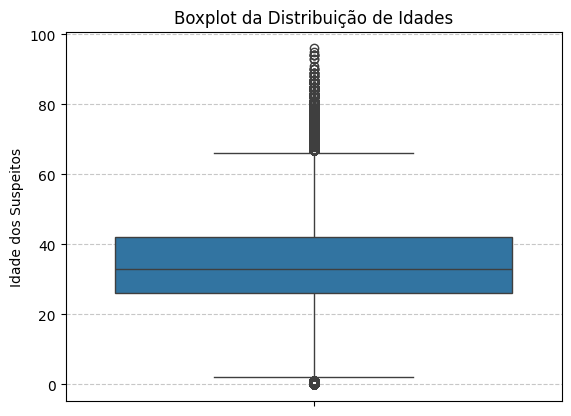

In [10]:
fig, ax = plt.subplots()
# Use o Seaborn para desenhar o boxplot NO EIXO (ax) que criamos.
sns.boxplot(y=df_suspeitos['Age'], ax=ax)
# Configure os títulos e rótulos USANDO o objeto 'ax'.
ax.set_title('Boxplot da Distribuição de Idades')
ax.set_ylabel('Idade dos Suspeitos')
ax.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade para melhor leitura

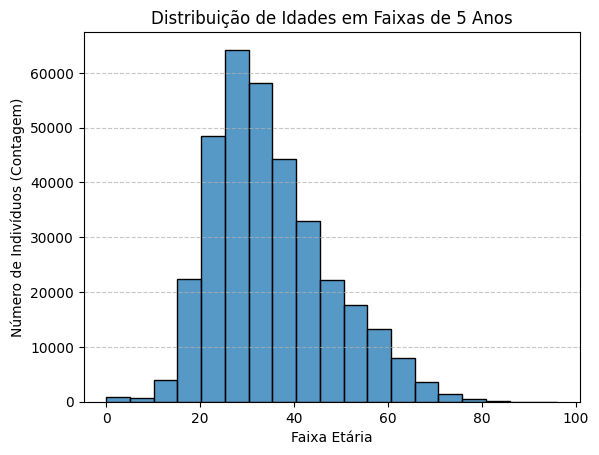

In [12]:
fig, ax = plt.subplots()
# Use o Seaborn para desenhar o boxplot NO EIXO (ax) que criamos.
sns.histplot(x=df_suspeitos['Age'], ax=ax, binwidth=5)
# Configure os títulos e rótulos USANDO o objeto 'ax'.
ax.set_title('Distribuição de Idades em Faixas de 5 Anos')
ax.set_ylabel('Número de Indivíduos (Contagem)')
ax.set_xlabel('Faixa Etária')
ax.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona uma grade para melhor leitura

In [14]:
# Análise dos outliers de idade (Registros com z-score de idade > 3)
df_menores_10 = df_arrest_data[['Age', 'Charge Group Description']].loc[df_arrest_data['Age'] < 9].drop_duplicates()
df_menores_10

Age Charge Group Description
2         2                      NaN
129       2   Non-Criminal Detention
141       6   Non-Criminal Detention
173       5                      NaN
672       5   Non-Criminal Detention
900       1   Non-Criminal Detention
1204      0                      NaN
1410      8   Non-Criminal Detention
1932      7                      NaN
2857      3   Non-Criminal Detention
3142      0   Non-Criminal Detention
4957      8                      NaN
5281      4                      NaN
6700      1                      NaN
7758      3                      NaN
7932      4   Non-Criminal Detention
8014      6                      NaN
13141     7   Non-Criminal Detention
77716     0     Disturbing the Peace
237697    4               Drunkeness
302488    0          Pre-Delinquency

### Sexo

In [17]:
df_suspeitos['Sex Code'].describe()

count     342733
unique         2
top            M
freq      273018
Name: Sex Code, dtype: object

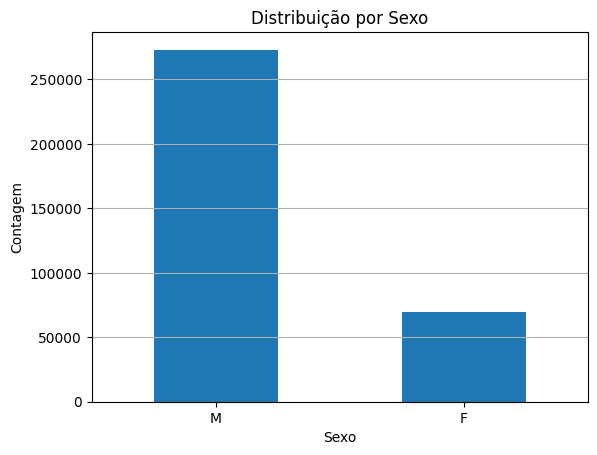

Masculino: 79.66%
Feminino: 20.34%


In [27]:
df_suspeitos['Sex Code'].value_counts().plot(kind='bar', title='Distribuição por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.xticks(rotation=0) # Rotaciona os rótulos do eixo x para a horizontal
plt.grid(axis='y', visible=True, )
plt.show()

freq_rel_m = len(df_suspeitos['Sex Code'].loc[df_suspeitos['Sex Code'] == 'M'])/len(df_suspeitos['Sex Code'])*100
freq_rel_f = len(df_suspeitos['Sex Code'].loc[df_suspeitos['Sex Code'] == 'F'])/len(df_suspeitos['Sex Code'])*100
print(f'Masculino: {freq_rel_m:.2f}%')
print(f'Feminino: {freq_rel_f:.2f}%')

### Descendência

In [29]:
df_suspeitos['Descent Code'].describe()

count     342733
unique        19
top            H
freq      176041
Name: Descent Code, dtype: object

In [ ]:
freq_rel_desc_outros = 0
for desc in df_suspeitos['Descent Code'].unique():
    freq_rel_desc = len(df_suspeitos['Descent Code'].loc[df_suspeitos['Descent Code'] == desc])/len(df_suspeitos['Descent Code'])*100
    print(f'{desc}: {freq_rel_desc:.2f}%')

H: 51.36%
B: 27.17%
O: 5.30%
W: 15.65%
K: 0.04%
A: 0.31%
U: 0.00%
C: 0.05%
F: 0.05%
I: 0.01%
V: 0.00%
Z: 0.00%
X: 0.02%
S: 0.00%
P: 0.01%
J: 0.01%
G: 0.02%
D: 0.00%
L: 0.00%


## Análise de dados relacionados as prisões

### Horário de Ocorrência das Prisões

<Axes: xlabel='Hora'>

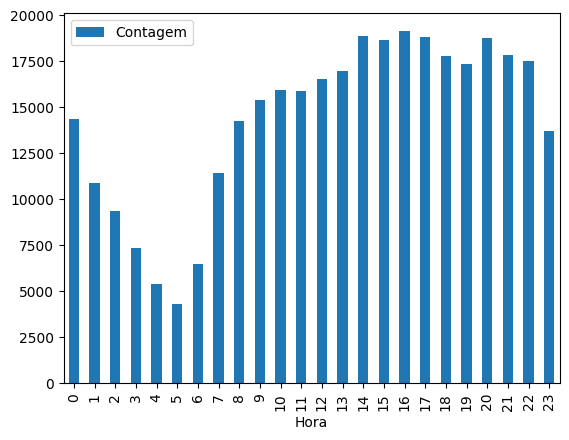

In [91]:
# Criando classes de 00h a 23h para os registros do df
df_crimes_horario = df_arrest_data.groupby(['Time']).size().reset_index(name='Contagem')
df_crimes_horario['Time'] = df_crimes_horario['Time'].astype(int)
df_crimes_horario['Hora'] = (df_crimes_horario['Time'] - 1) // 100
df_crimes_horario_hora = df_crimes_horario[['Hora','Contagem']].groupby(['Hora']).sum().reset_index()
df_crimes_horario_hora.plot(kind='bar', x='Hora')

In [23]:
from scipy.stats import ttest_ind
            
"""
Realiza um teste t para verificar se há diferença significativa
no horário médio de prisão entre homens e mulheres.
"""
# Removendo linhas onde 'Time' ou 'Sex Code' são nulos
df_clean = df_arrest_data.dropna(subset=['Time', 'Sex Code'])

# Filtrando DataFrame para incluir apenas 'M' (Masculino) e 'F' (Feminino)
df_filtered = df_clean[df_clean['Sex Code'].isin(['M', 'F'])]

# Separando os dados em duas amostras
# Amostra 1: Horários de prisão para homens
horarios_homens = df_filtered[df_filtered['Sex Code'] == 'M']['Time']

# Amostra 2: Horários de prisão para mulheres
horarios_mulheres = df_filtered[df_filtered['Sex Code'] == 'F']['Time']

print(f"Analisando {len(horarios_homens)} prisões de homens e {len(horarios_mulheres)} prisões de mulheres.")
print("-" * 50)

# Realizando o Teste T para Amostras Independentes
# A função ttest_ind calcula o teste t
stat, p_value = ttest_ind(horarios_homens, horarios_mulheres, equal_var=False) # Usamos equal_var=False pois os tamanhos das amostras são muito diferentes

# Apresentando e Interpretando os Resultados
print(f"Estatística do Teste (t-statistic): {stat:.4f}")
print(f"Valor-p (p-value): {p_value:.4f}")
print("-" * 50)

# Definimos nosso nível de significância (alfa)
alfa = 0.05

if p_value < alfa:
    print(f"Conclusão: Como o valor-p ({p_value:.4f}) é menor que {alfa}, rejeitamos a hipótese nula.")
    print("Há uma diferença estatisticamente significativa no horário médio de prisão entre homens e mulheres.")
else:
    print(f"Conclusão: Como o valor-p ({p_value:.4f}) é maior ou igual a {alfa}, não podemos rejeitar a hipótese nula.")
    print("Não há evidências de uma diferença estatisticamente significativa no horário médio de prisão entre homens e mulheres.")

Analisando 273003 prisões de homens e 69709 prisões de mulheres.
--------------------------------------------------
Estatística do Teste (t-statistic): 4.1333
Valor-p (p-value): 0.0000
--------------------------------------------------
Conclusão: Como o valor-p (0.0000) é menor que 0.05, rejeitamos a hipótese nula.
Há uma diferença estatisticamente significativa no horário médio de prisão entre homens e mulheres.


<Axes: xlabel='Charge Group Code'>

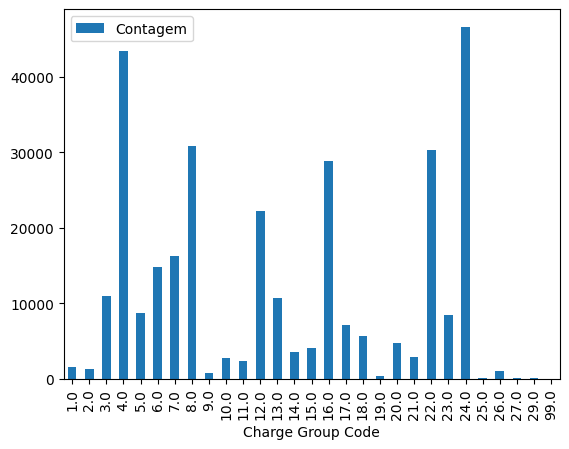

In [130]:
df_arrest_data_crimes = df_arrest_data.groupby('Charge Group Code').agg(
    # 1. Crie a coluna 'Contagem' contando o número de ocorrências em cada grupo
    Contagem=('Charge Group Code', 'size'),
    
    # 2. Crie a coluna 'Charges_Descriptions'
    Charges_Descriptions=('Charge Description', lambda x: '; '.join(sorted(x.unique())))
).reset_index()

df_arrest_data_crimes.plot(kind='bar', x='Charge Group Code', y='Contagem')

### Localização de Ocorrência dos Crimes

In [92]:
df_coordenadas = df_arrest_data[['LAT', 'LON']]
df_coordenadas.dropna()
# Selecionando apenas as coordenadas que não são outliers em LAT ou LON
df_coordenadas = df_coordenadas[
    (np.abs(stats.zscore(df_coordenadas['LAT'])) < 3) & 
    (np.abs(stats.zscore(df_coordenadas['LON'])) < 3)
] 
mapa = folium.Map(location=[34.0522, -118.2437], zoom_start=10)
coordenadas = df_coordenadas[['LAT', 'LON']]
coordenadas = coordenadas.to_dict()
latitudes = coordenadas['LAT']
longitude = coordenadas['LON']
heat_data = list(zip(latitudes.values(), longitude.values()))
mapa_calor = HeatMap(heat_data, radius=8, blur=12)
mapa.add_child(mapa_calor)
print("Mapa de Calor de Ocorrência de Crimes")
mapa

Mapa de Calor de Ocorrência de Crimes
